## 5. 머신러닝

### 5.2 데이터

실제 데이터인 EUR/USD데이터를 사용한다.

In [2]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [3]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [4]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']

In [5]:
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

In [15]:
l = raw.resample('1M').last()

/tmp/ipykernel_45531/2373559149.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  l = raw.resample('1M').last()


<Axes: title={'center': 'EUR/USD monthly'}, xlabel='Date'>

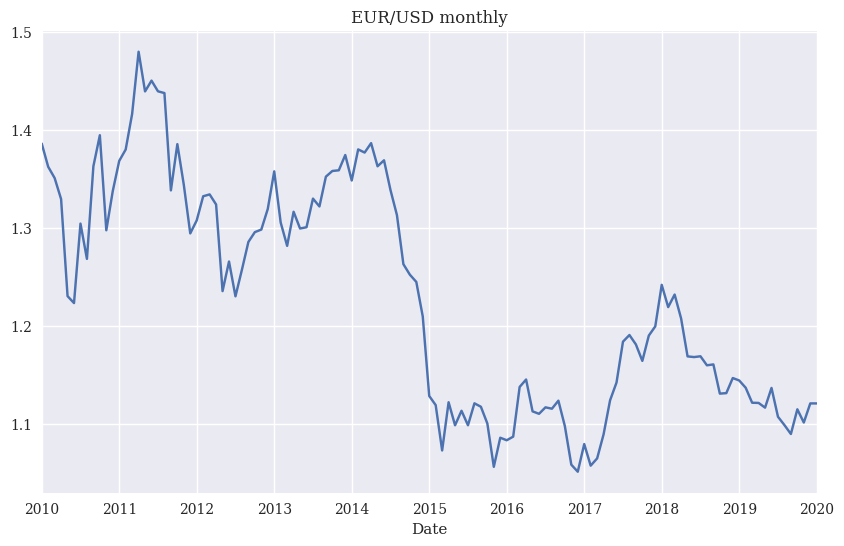

In [16]:
l.plot(figsize=(10,6), title='EUR/USD monthly')

In [ ]:
l = l.values # 인덱스 제거 (날짜 제거)

In [20]:
l -= l.mean()

In [22]:
f = np.linspace(-2, 2, len(l))

Text(0, 0.5, 'labels')

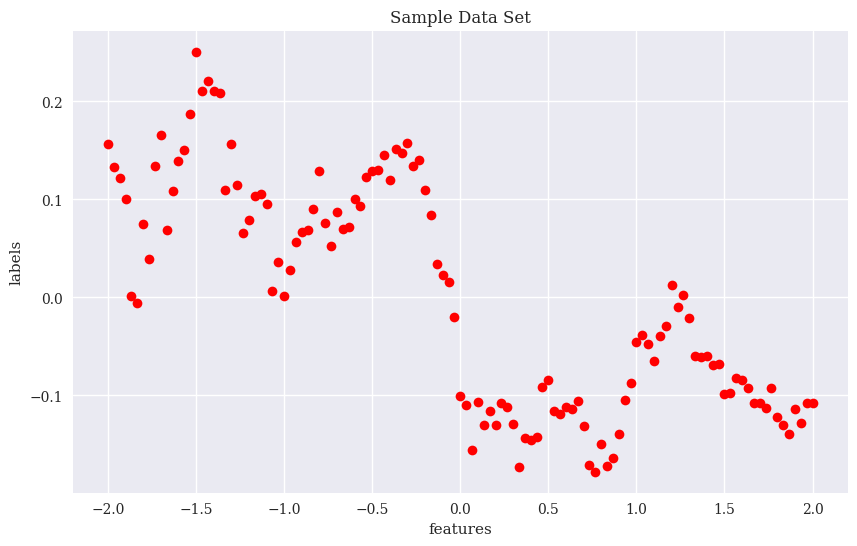

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels')

f가 x축, l이 y축이다.   
둘이 길이가 같기 때문에 1:1 매칭이 되며 인덱스만 바뀐다.
-2, 2 범위를 쓰는 이유는 가우시안분포처럼 0을 기준으로 하기 위함

### 5.3 성공

데이터의 일부를 평균제곱오차를 통해 성공 여부를 판단한다.

#### 평균오차제곱

In [31]:
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [32]:
reg = np.polyfit(f, l, deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [33]:
p = np.polyval(reg, f)

In [34]:
MSE(l, p)

np.float64(0.0034166422957371025)

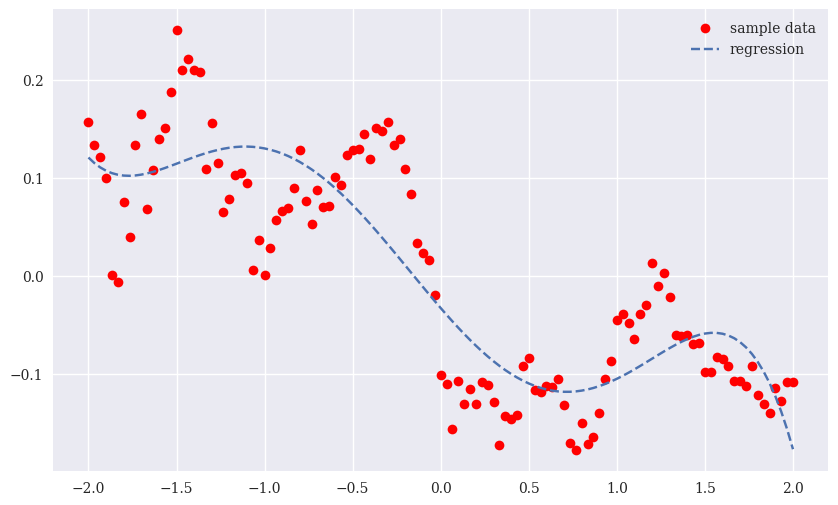

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='regression')
plt.legend()

아래는 회귀분석의 반복학습 시뮬레이션이다.   
원래 회귀분석은 반복학습을 하지 않는다.   
하지만 시뮬레이션은 가능하다.

In [36]:
for i in range(10, len(f) + 1, 20):
    reg = np.polyfit(f[:i], l[:i], deg = 3)
    p = np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681642307
 30 | MSE=731.9382249304656
 50 | MSE=12.236088505004469
 70 | MSE=0.7410590619743299
 90 | MSE=0.005743061730409331
110 | MSE=0.006492800939555579


#### 신경망

In [39]:
import tensorflow as tf
tf.random.set_seed(100)

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2025-03-09 15:23:29.038841: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 15:23:29.042020: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 15:23:29.051969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741501409.068786    1062 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741501409.073793    1062 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 15:23:29.090980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 946509399229241401
 xla_global_id: -1]